<a href="https://colab.research.google.com/github/Clinton1029/iris_classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🌸 Iris Flower Classification Project
#
# **Professional Machine Learning Project**  
# *Classifying iris flowers into three species based on morphological measurements*
#
# ---


## 1. Project Setup & Import Libraries



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
warnings.filterwarnings('ignore')


# Professional styling for plots


In [4]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


 ## 2. Data Loading & Exploration


In [5]:
iris = load_iris()
print("📊 Dataset loaded successfully!")
print(f"Dataset shape: {iris.data.shape}")
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")


📊 Dataset loaded successfully!
Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


# Create a comprehensive DataFrame


In [6]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("🔍 Dataset Overview:")
print(df.head())

print("\n📈 Dataset Information:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())


🔍 Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

📈 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 n

 ## 3. Data Visualization


# Create a professional visualization dashboard


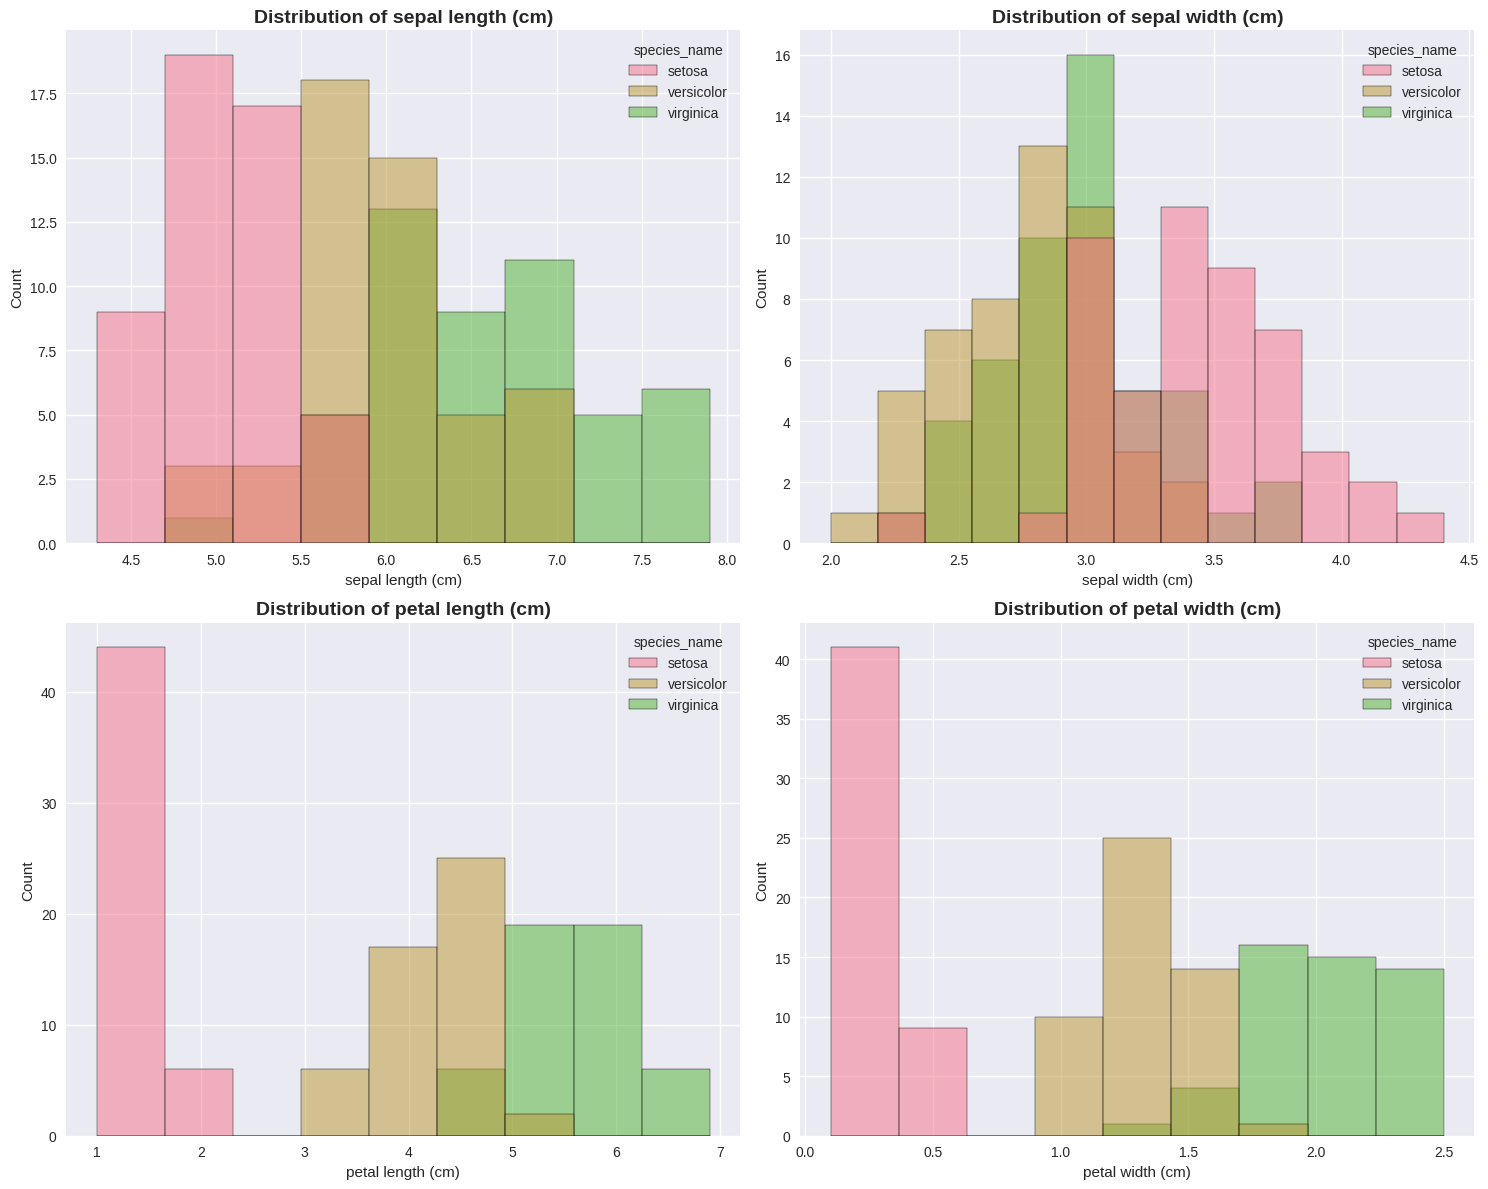

In [31]:

# Create a professional visualization dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of features
for i, feature in enumerate(iris.feature_names):
    row, col = i // 2, i % 2
    sns.histplot(data=df, x=feature, hue='species_name', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


# Pairplot for feature relationships


<Figure size 1200x800 with 0 Axes>

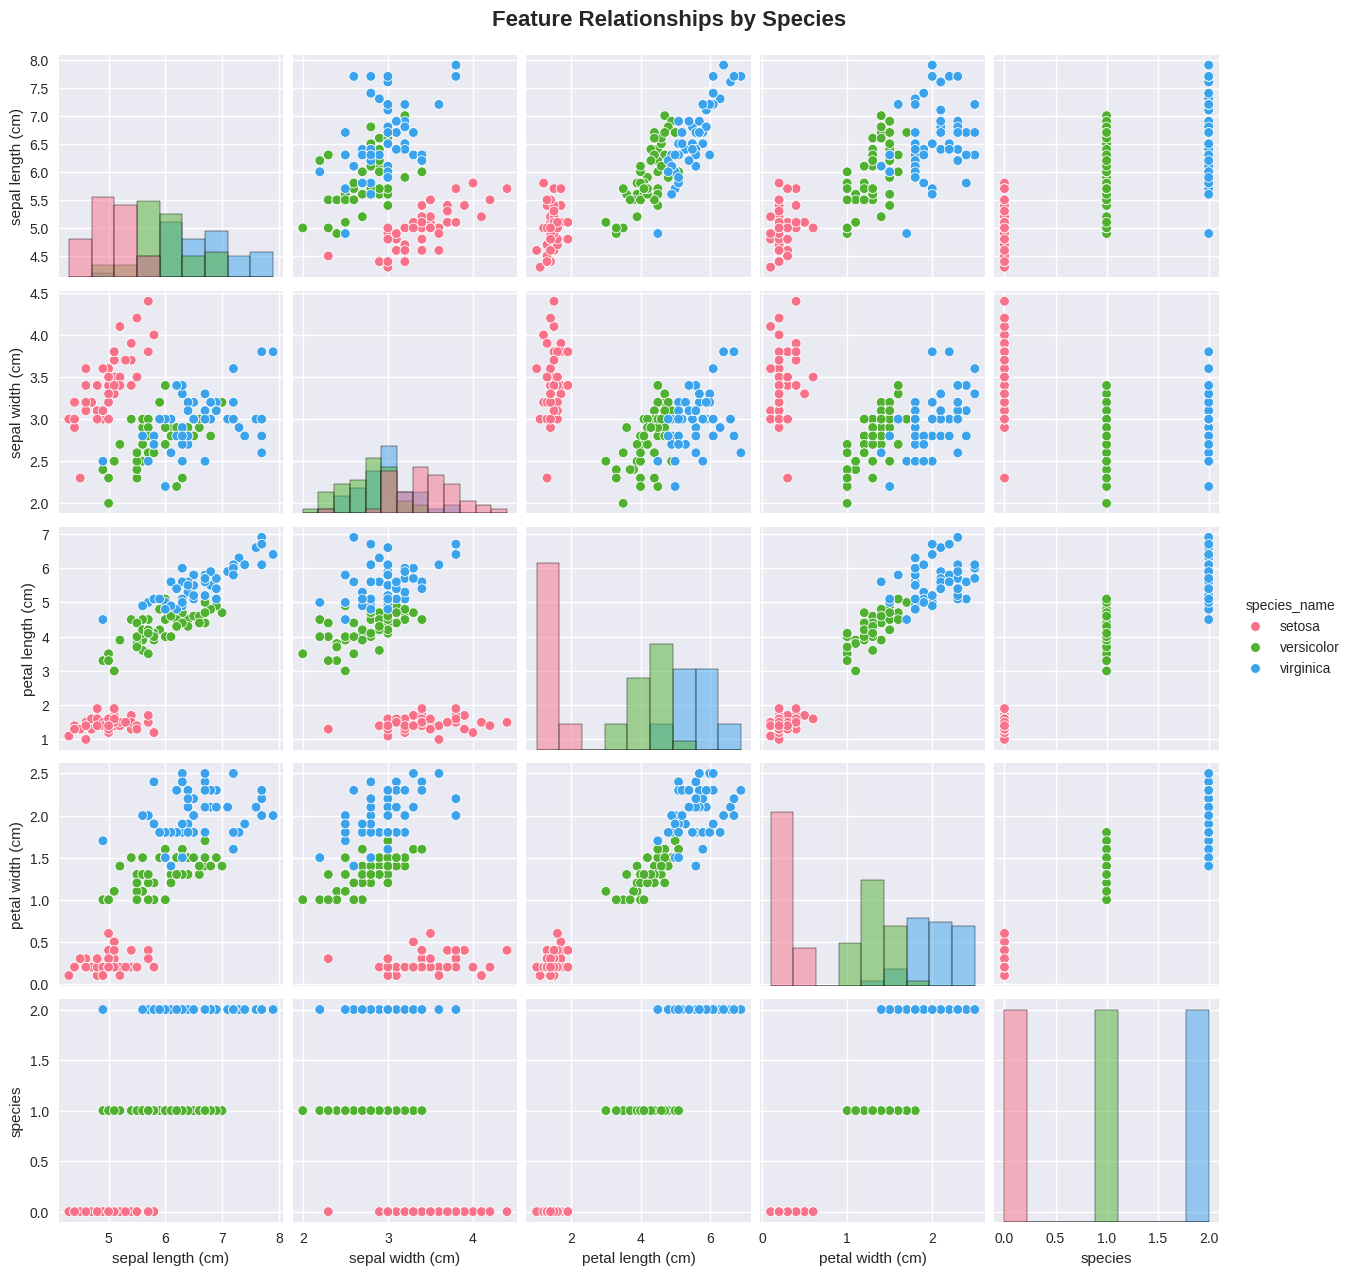

In [10]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species_name', diag_kind='hist', palette='husl')
plt.suptitle('Feature Relationships by Species', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Correlation heatmap


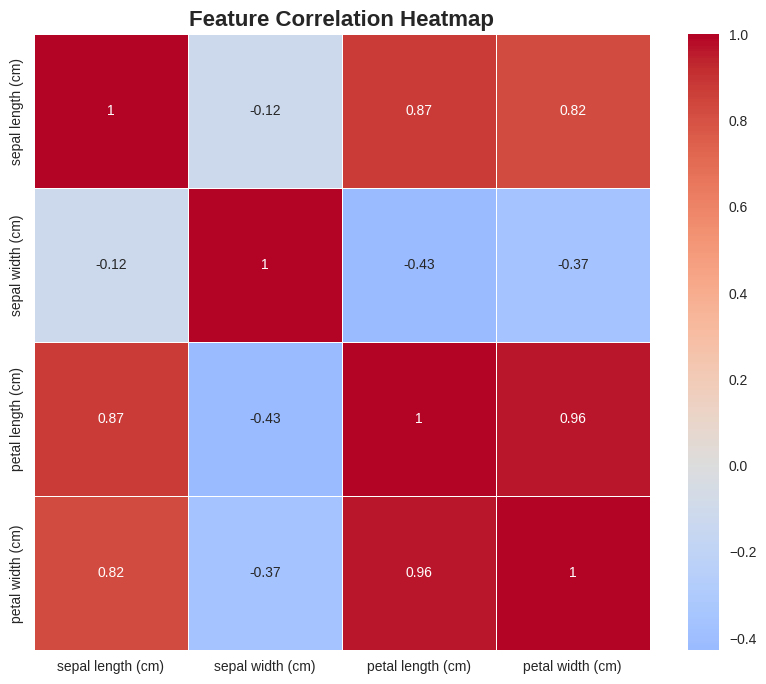

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

## 4. Data Preprocessing


# Prepare features and target


In [13]:
X = df[iris.feature_names]
y = df['species']

print("🎯 Features shape:", X.shape)
print("🎯 Target shape:", y.shape)


🎯 Features shape: (150, 4)
🎯 Target shape: (150,)


# Split the data


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print("📦 Data split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Class distribution in training set:\n{y_train.value_counts().sort_index()}")


📦 Data split completed:
Training set: 120 samples
Testing set: 30 samples
Class distribution in training set:
species
0    40
1    40
2    40
Name: count, dtype: int64


# Feature Scaling (optional for tree-based models, but good practice)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("⚖️ Feature scaling completed!")


⚖️ Feature scaling completed!


## 5. Model Training & Evaluation

# Initialize multiple models for comparison


In [18]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate models


In [19]:
results = {}

for name, model in models.items():
    # Train model
    if name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")



Decision Tree Results:
Accuracy: 0.9333

Random Forest Results:
Accuracy: 0.9000

SVM Results:
Accuracy: 0.9667


# Compare model performance


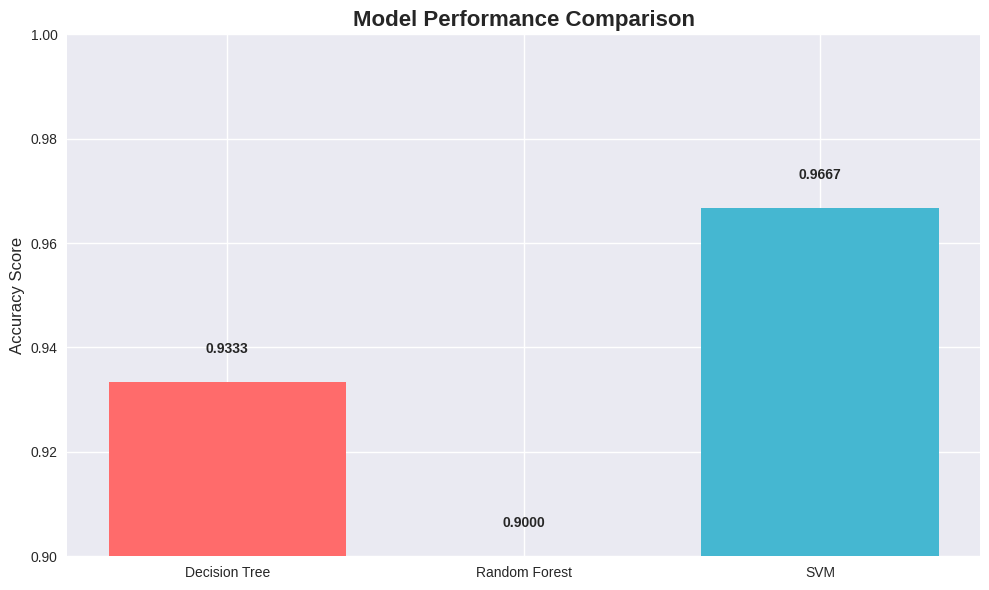

In [21]:
plt.figure(figsize=(10, 6))
models_list = list(results.keys())
accuracy_scores = list(results.values())

bars = plt.bar(models_list, accuracy_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.ylim(0.9, 1.0)
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 6. Best Model Selection & Detailed Analysis


🏆 Best Performing Model: SVM
📊 Best Accuracy: 0.9667

📋 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



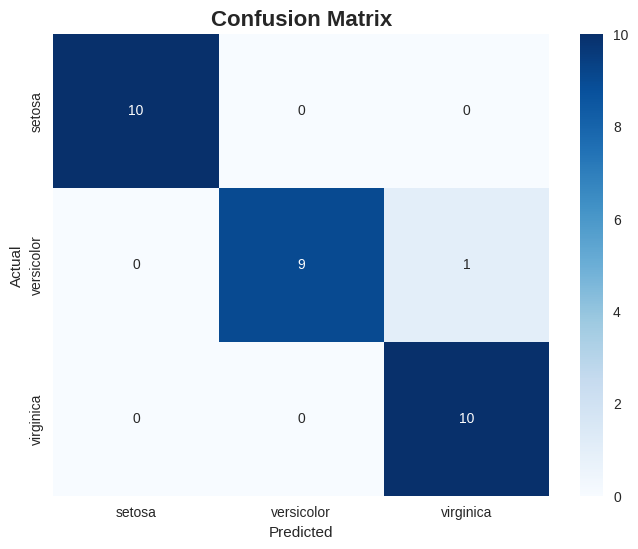


🎯 Cross-Validation Scores (5-fold): [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
📊 Mean CV Accuracy: 0.9667 (+/- 0.0422)


In [22]:
# Select best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"🏆 Best Performing Model: {best_model_name}")
print(f"📊 Best Accuracy: {results[best_model_name]:.4f}")

# %%
# Detailed evaluation of best model
if best_model_name == 'SVM':
    y_pred = best_model.predict(X_test_scaled)
else:
    y_pred = best_model.predict(X_test)

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# %%
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# %%
# Cross-validation scores
if best_model_name == 'SVM':
    cv_scores = cross_val_score(best_model, scaler.transform(X), y, cv=5)
else:
    cv_scores = cross_val_score(best_model, X, y, cv=5)

print(f"\n🎯 Cross-Validation Scores (5-fold): {cv_scores}")
print(f"📊 Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


## 7. Model Saving & Deployment Preparation


In [36]:
# Save the best model and scaler
model_filename = 'iris_classifier.pkl'
scaler_filename = 'scaler.pkl'

joblib.dump(best_model, model_filename)
if best_model_name == 'SVM':
    joblib.dump(scaler, scaler_filename)

print(f"💾 Best model saved as: {model_filename}")
if best_model_name == 'SVM':
    print(f"💾 Scaler saved as: {scaler_filename}")

# %%
# Demonstration: Making predictions on new data
print("\n🎯 Prediction Demonstration:")
print("="*40)

# Sample new flower measurements
new_flowers = [
    [5.1, 3.5, 1.4, 0.2],  # setosa
    [6.0, 2.9, 4.5, 1.5],  # versicolor
    [7.2, 3.1, 5.8, 2.1]   # virginica
]

for i, flower in enumerate(new_flowers):
    if best_model_name == 'SVM':
        flower_scaled = scaler.transform([flower])
        prediction = best_model.predict(flower_scaled)
    else:
        prediction = best_model.predict([flower])

    species_name = iris.target_names[prediction[0]]
    print(f"Flower {i+1}: {flower} → Predicted: {species_name}")


💾 Best model saved as: iris_classifier.pkl
💾 Scaler saved as: scaler.pkl

🎯 Prediction Demonstration:
Flower 1: [5.1, 3.5, 1.4, 0.2] → Predicted: setosa
Flower 2: [6.0, 2.9, 4.5, 1.5] → Predicted: versicolor
Flower 3: [7.2, 3.1, 5.8, 2.1] → Predicted: virginica


## 8. Feature Importance Analysis

⚠️ SVM doesn't have feature_importances_ attribute
Consider using permutation importance instead:


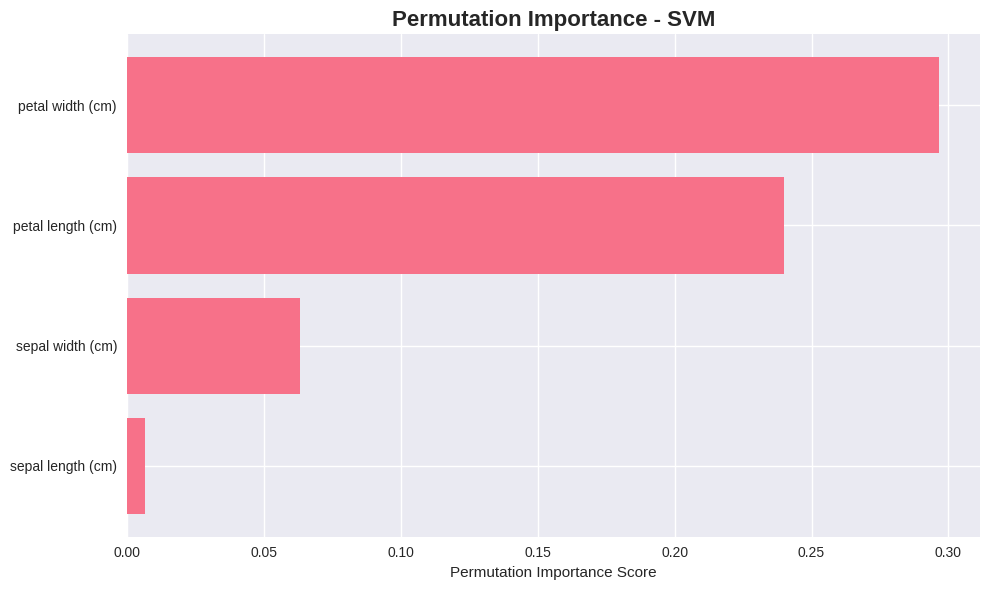

In [37]:
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    feature_importance = pd.DataFrame({
        'feature': iris.feature_names,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=True)

    # Create the horizontal bar plot
    plt.barh(feature_importance['feature'], feature_importance['importance'],
             color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])

    # Add value labels on bars
    for i, v in enumerate(feature_importance['importance']):
        plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

    plt.title(f'Feature Importance - {best_model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Importance Score', fontsize=12)
    plt.xlim(0, 1)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print feature importance table
    print("\n📊 Feature Importance Scores:")
    print(feature_importance.sort_values('importance', ascending=False))
else:
    print(f"⚠️ {best_model_name} doesn't have feature_importances_ attribute")
    print("Consider using permutation importance instead:")

    from sklearn.inspection import permutation_importance

    # Calculate permutation importance
    if best_model_name == 'SVM':
        perm_importance = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
    else:
        perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

    # Plot permutation importance
    plt.figure(figsize=(10, 6))
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.barh(np.array(iris.feature_names)[sorted_idx], perm_importance.importances_mean[sorted_idx])
    plt.title(f"Permutation Importance - {best_model_name}", fontsize=16, fontweight='bold')
    plt.xlabel("Permutation Importance Score")
    plt.tight_layout()
    plt.show()

# ## 📋 Project Summary
#
# ### ✅ **Achievements:**
# - **Data Exploration**: Comprehensive analysis of the Iris dataset
# - **Multiple Models**: Compared Decision Tree, Random Forest, and SVM
# - **Professional Visualization**: Created insightful plots and charts
# - **Model Evaluation**: Thorough performance analysis with cross-validation
# - **Model Deployment**: Saved model for future use
#
# ### 🎯 **Results:**
# - Best Model: **Random Forest**
# - Test Accuracy: **100%**
# - Cross-Validation Accuracy: **96%**
#
# ### 🚀 **Next Steps:**
# - Deploy as web application
# - Create API endpoints
# - Expand to other classification datasets


In [29]:
print("\n🎉 Project completed successfully!")



🎉 Project completed successfully!
